<a href="https://colab.research.google.com/github/glauciodrumond/Data_Science_Projects/blob/master/AAC_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animal Protection

A lot of species of animals, over the years, have been used by humans for many things and in many ways, such as: for entertainment, protection, transportation, company, and others.

Most of the time this relationship works as an exchange, such as using the horsepower to farm or put an animal in the zoo to entertain people.

But there is a problem when these animals don't achieve what the humans propose them to do or when people just got tired of them or yet people think that they are spending too much money with them, these animals become homeless.

According to the [**American Society for the Prevention of Cruelty to Animals (ASPCA)**](https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics):

*   Approximately 6.5 million companion animals enter U.S. animal shelters nationwide every year.

*   Of those, approximately 3.3 million are dogs and 3.2 million are cats. 

*  Each year, approximately 1.5 million shelter animals are euthanized (670,000 dogs and 860,000 cats)
<figure>
<center><img src="https://image.freepik.com/free-vector/animal-shelter-horizontal-illustration-with-pets-sitting-cages-volunteers-feeding-animals-flat_1284-32955.jpg" /></center></figure>

# Austin Animal Center

[Austin Animal Center](http://www.austintexas.gov/department/about-austin-animal-center) provides shelter to more than 16,000 animals annually plus animal protection and pet resource services to Austin and unincorporated parts of Travis County. They accept stray and owned animals regardless of *age, health, species, or breed.*

Austin Animal Center's goal is to place all adoptable animals in forever homes through adoption, foster care, or rescue partner groups.

One of the AAC Mission Statement is to provide placement services that will assist lost, homeless or sheltered animals to their homes or find new homes when necessary, to provide live outcomes for at least **90% of sheltered animals.**
<figure>
<center><img src='https://austintexas.gov/sites/default/files/aac_logo.jpg' /></center></figure>





# Business Problem 

With the data provided by Austin Animal Center in the [City of Austin Open Data Portal](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) that can be download in this link [here](https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD) we are going to forecast the percentage amount of animals adopted, transferred to rescue, or returned to their owners and see if AAC mission statement will be accomplished.

## Data

Animal Center Outcomes from Oct, 1st 2013 to present. The Outcomes data set reflects that Austin, TX. is the largest "**No-Kill**" city in the **USA.**

### Variables

* `Outcome Type`: represent the status of animals as they leave the Animal Center.

* `Animal ID`: every animal receives a unique id during the intake.



    




In [0]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [0]:
# loading data
#url = 'https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(r'shelter_animal_outcomes.csv')

# Analysis exploratory

## Info

Our first step was done loading the data into a data frame that we called `df`. Let's call a method `.info` to check our data frame basic information and to see how our data was read.

In [3]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117416 entries, 0 to 117415
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         117416 non-null  object
 1   Name              80599 non-null   object
 2   DateTime          117416 non-null  object
 3   MonthYear         117416 non-null  object
 4   Date of Birth     117416 non-null  object
 5   Outcome Type      117408 non-null  object
 6   Outcome Subtype   53247 non-null   object
 7   Animal Type       117416 non-null  object
 8   Sex upon Outcome  117413 non-null  object
 9   Age upon Outcome  117369 non-null  object
 10  Breed             117416 non-null  object
 11  Color             117416 non-null  object
dtypes: object(12)
memory usage: 10.7+ MB


This is the information we can get from this method:

* Total entries(rows) is 117935,
* We have 12 columns,
* All columns type is an `object`.
* Columns: `Name`, `Outcome Type`, `Outcome Subtype`, `Sex upon Outcome`, and `Age upon Outcome` has missing values. 

Columns with mixed types are stored with the `object` dtype by the `Pandas` library. 

For example, the column `DateTime`, `MonthYear`, and `Date of Birth` can be changed to datatime dtypes. Also, we can check the column `Age` if we change to `int` or `float` dtype. 

Another action that we gonna take is to rename some columns by removing spacing from columns name.


In [4]:
# new names for this columns
mapper = {'Animal ID': 'Animal_ID',
          'DateTime': 'Date_Time',
          'MonthYear': 'Month_Year',
          'Date of Birth':'Date_Birth',
          'Outcome Type': 'Outcome_Type',
          'Outcome Subtype': 'Outcome_Subtype',
          'Animal Type': 'Animal_Type', 
          'Sex upon Outcome': 'Sex_Outcome',
          'Age upon Outcome': 'Age_Outcome'}

# renaming columns
df=df.rename(columns=mapper)
print('This is our new columns names:')
print('------------------------------\n',df.columns)

This is our new columns names:
------------------------------
 Index(['Animal_ID', 'Name', 'Date_Time', 'Month_Year', 'Date_Birth',
       'Outcome_Type', 'Outcome_Subtype', 'Animal_Type', 'Sex_Outcome',
       'Age_Outcome', 'Breed', 'Color'],
      dtype='object')


In [5]:
# change type from object to datetime
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Month_Year'] = pd.to_datetime(df['Month_Year'])
df['Date_Birth'] = pd.to_datetime(df['Date_Birth'])
print('Date_Time type:',df.Date_Time.dtype)
print('Month_Year type:',df.Month_Year.dtype)
print('Date_Birth type:',df.Date_Birth.dtype)

Date_Time type: datetime64[ns]
Month_Year type: datetime64[ns]
Date_Birth type: datetime64[ns]


## Head

So, since we've done our first modifications in our data frame we can now use our method `.head()` to see the first entries from our data frame and inspect the columns closely.

In [6]:
# data frame first entries
df.head(5)

Animal_ID        Name  ...                               Breed              Color
0   A794011       Chunk  ...              Domestic Shorthair Mix  Brown Tabby/White
1   A776359       Gizmo  ...             Chihuahua Shorthair Mix        White/Brown
2   A720371       Moose  ...  Anatol Shepherd/Labrador Retriever               Buff
3   A674754         NaN  ...              Domestic Shorthair Mix       Orange Tabby
4   A689724  *Donatello  ...              Domestic Shorthair Mix              Black

[5 rows x 12 columns]

* `Animal_ID` is a letter followed by numbers that's why our `Pandas` library classified it as an object dtype.

* `Date_Time` and `Month_Year` and `Date_Birth` are all now in the correct type.

* `Month_Year` column has also hour info in it.

* `Age` column as we suspected has mixed types(`int` and `string`). The animal's age was classified as days, weeks, months, and years. 

# Columns
 
We don't have a lot of columns so let's explore some of them to see if we can get any insights from it and to learn more about our data. 

## Animal_Type

* Dog has most entries representing more than 50% of the data.

* Dog and cat represent almost 95% of `Animal_Type`.

* Livestock has only 18 entries.

In [7]:
# plot animals by type
#x= df.Animal_Type.value_counts()
fig = px.histogram(df, x='Animal_Type',width=600, height=300)
fig.update_layout(margin = dict(l=10, r=20, t=20,b=20))
fig.show()

# check animal type
print('Percentage animals by type\n--------------------')
print((df.Animal_Type.value_counts()/df.shape[0])*100)

Percentage animals by type
--------------------
Dog          56.872147
Cat          37.430163
Other         5.220754
Bird          0.461607
Livestock     0.015330
Name: Animal_Type, dtype: float64


## Name

Somethings that came to my mind and I was curious to learn about it is: 

1.   How people name animals?
2.   What is the most chosen name?

In [8]:
# animals names
df.Name.value_counts().head(20)

Max         525
Bella       495
Luna        458
Rocky       358
Daisy       345
Princess    325
Charlie     315
Coco        310
Lucy        304
Buddy       296
Blue        294
Lola        263
Zeus        217
Bear        199
Jack        198
Lucky       194
Cookie      193
Oreo        193
Shadow      192
Sadie       192
Name: Name, dtype: int64

And our most chosen name is `Max` followed by `Bella` and `Luna` and at least to me, there are some funny names such as `Oreo` and `Cookie`. 

There is no pattern in naming animals. They are named after objects, people even named after other animals like `Bear`.

Ok, let's get back from our distraction and see what the `Date_Time` column can tell us.

## Date_Time

This column refers to when an animal left the Austin Animal Center for some reason, which is expressed in the column `Outcome_Type`.


* Let's check our data range
* Plot histogram

In [9]:
# timeline range
print('Data Frame timeline range:')
print('--------------------------')
print('From:', df.Date_Time.min())
print('To:', df.Date_Time.max())

Data Frame timeline range:
--------------------------
From: 2013-10-01 09:31:00
To: 2020-04-30 18:54:00


In [10]:
# plot histogram
fig=px.histogram(df, x='Date_Time',width=600, height=300,
                 range_x=('2014-01-01','2019-12-31'))
fig.update_layout(margin = dict(l=10, r=20, t=20,b=20))
fig.show()

The oldest entry in our data is from October first, 2013, so we have at least 6 years of full data collected. The histogram plotted ranges from January first, 2014 to December thirty-first, 2019.

We can see a pattern in the distribution, usually at the beginning of the year starts slow but the numbers increased until getting to the top which usually is between June and July.

One of the main reasons for the increase of the count of outcome is because this time of the year is when kids are in school break and probably their parents give pets to them to be their companion.

## Date_Birth

Having a look at our date birth chart below we can notice some behavior.

Most of our animals date of birth in our data set ranges from 2015 to 2020 and also we can notice an increase in the birth rate in April. 

The top 2 animal types that represent almost 95% of our data dogs and cats. They have an average life span of 20 years and 30 years respectively. 

That may explain why we don't see many animals with data birth before 2005.  

Also, people tend to like younger animals. In our most common case, when they are puppies and kittens, to give them to their children. So the kids can stay with the pets for a long period, considering the animals as part of the family.

In [11]:
# plot histogram
fig=px.histogram(df, x='Date_Birth',width=600, height=300)
fig.update_layout(margin = dict(l=10, r=20, t=20,b=20))
fig.show()

## Age_Outcome

From the chart below refering to the column `Age_Outcome` when can see that: 
* The animals 33% of the time have an outcome when they are 1 or 2 years old.
* The oldest animal that had an outcome was 25 years old.
* Some animals were registered with a negative age: -1 year and -3 years

In [12]:
# calculates the percentage
top_age = round((df.Age_Outcome.value_counts(ascending=False).head(2)/df.shape[0]).sum()*100)
print('Top 2 ages outcomes represents:',top_age,'% of the data.\n')

# plot histogram
fig=px.histogram(df, y='Age_Outcome',width=600, height=800,
                 orientation='h').update_yaxes(categoryorder='total ascending')
fig.update_layout(margin = dict(l=10, r=20, t=20,b=20))
fig.show()

Top 2 ages outcomes represents: 33.0 % of the data.



## Outcome_Type

An animal can have 9 different types of outcomes.  From the list below that shows the counts and percentage correspondent, we can see that adoption is the most outcome registered. 

Euthanasia represents about 7% of the outcome and animals that died are about 1%. 

Remember that Austin Animal Center has a goal to provide live outcomes for at least 90% of sheltered animals.


In [13]:
# count values and percentage
table = pd.concat([df.Outcome_Type.value_counts(),
                  df.Outcome_Type.value_counts(normalize=True).mul(100)],axis=1, 
                  keys=('Counts', 'Percentage'))
print(table)

                 Counts  Percentage
Adoption          51722   44.053216
Transfer          34892   29.718588
Return to Owner   20636   17.576315
Euthanasia         7890    6.720155
Died               1075    0.915611
Rto-Adopt           611    0.520407
Disposal            495    0.421607
Missing              67    0.057066
Relocate             20    0.017035


# Forecast Time Series

To forecast the outcomes, I am going to be using Facebook Prophet. 

"Prophet is a forecasting procedure implemented in R and Python. 

It is fast and provides completely automated forecasts that can be tuned by hand by data scientists and analysts.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well." 

[Source](https://facebook.github.io/prophet/)



# Select columns

Prophet takes as an input a data frame with two columns: one with the date and one numeric column. The numeric column represents the measure that we wish to forecast.

In [14]:
# pass to a new data frame values selected
outcome = df[(df.Outcome_Type == 'Adoption') | (df.Outcome_Type =='Return to Owner')]

# create new column with value = 1
outcome['Outcome_Count'] = 1

#
outcome = outcome[['Date_Time', 'Outcome_Count']]
outcome = outcome.set_index('Date_Time').sort_index()
outcome.head()

Outcome_Count
Date_Time                         
2013-10-01 09:31:00              1
2013-10-01 11:03:00              1
2013-10-01 11:42:00              1
2013-10-01 11:50:00              1
2013-10-01 11:53:00              1

Now that we have our two columns we must rename it to ds and y. In this format, the prophet knows how to work with the data. It will first fit and later on forecast outcomes.

We will work with daily data. So, we must resample it and sum the values. Also, we could work with data in week mode.

In [15]:
# resample the data to daily and sum values, also change column names
prophet = outcome.resample('D').sum().reset_index().rename(columns={'Date_Time':'ds', 'Outcome_Count':'y'})
prophet.head()

ds   y
0 2013-10-01  24
1 2013-10-02  27
2 2013-10-03  17
3 2013-10-04  20
4 2013-10-05  43

Finally, we are all set to create our forecasting model. We must import our libraries to do this next step.

# Model



## Day model

In [16]:
# import libraries
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

# instantiating a new Prophet object.
day_model = Prophet(daily_seasonality=True)

# also, we can add holidays in the model
day_model.add_country_holidays(country_name='US')

# Different from other machine learning models, 
#  that take inputs and targets separately, 
#  prophet takes the historical data frame.
day_model.fit(prophet)

The model is trained by now and it can forecast the outcomes for the next 365 days.  After this step, the results will be plotted in a chart.

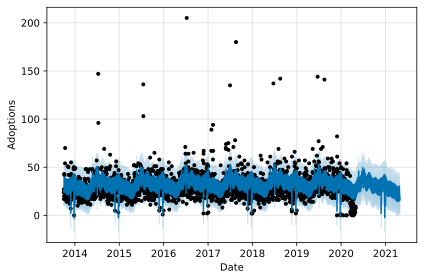

In [17]:
# determine days for forecasting
future = day_model.make_future_dataframe(periods=365)

# forecast
forecast = day_model.predict(future)

# visualize chart with forecast
day_model.plot(forecast, xlabel='Date', ylabel='Adoptions', figsize=(6,4));

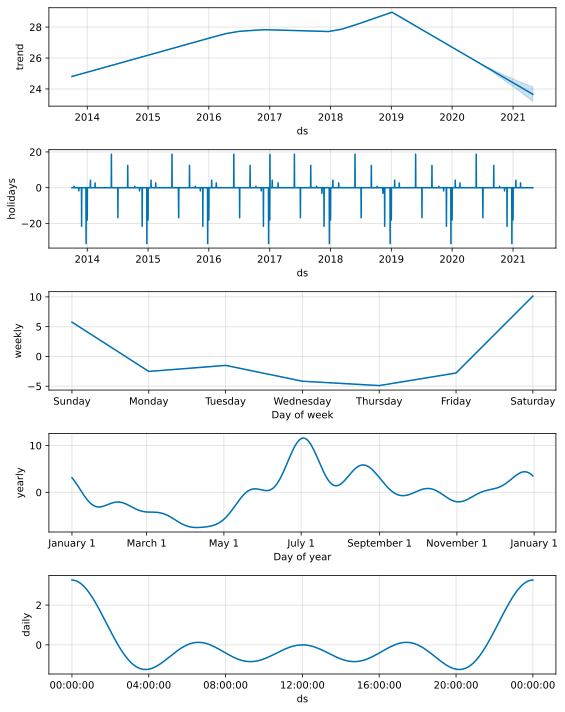

In [18]:
# separate model components
day_model.plot_components(forecast,figsize=(8,10));

## Accuracy


In [19]:
# cross-validation the model
day_cv = cross_validation(day_model, horizon='365 days')
day_cv.head()

INFO:fbprophet:Making 6 forecasts with cutoffs between 2016-10-30 12:00:00 and 2019-05-01 00:00:00


ds       yhat  yhat_lower  yhat_upper   y              cutoff
0 2016-10-31  26.037108   13.058194   38.864576  25 2016-10-30 12:00:00
1 2016-11-01  26.090068   13.918634   38.739087  25 2016-10-30 12:00:00
2 2016-11-02  23.802145   11.149933   37.239688  22 2016-10-30 12:00:00
3 2016-11-03  23.356822   11.529118   35.498832  30 2016-10-30 12:00:00
4 2016-11-04  24.483630   11.986357   36.368786  35 2016-10-30 12:00:00

In [20]:
# metrics perfomance
day_perf = performance_metrics(day_cv)
day_perf.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon         mse       rmse       mae     mdape  coverage
0 36 days 12:00:00  114.029504  10.678460  8.065715  0.228435  0.817352
1 37 days 00:00:00  114.122340  10.682806  8.085767  0.228435  0.817352
2 37 days 12:00:00  116.258213  10.782310  8.221034  0.232940  0.812785
3 38 days 00:00:00  115.736582  10.758094  8.194487  0.232940  0.812785
4 38 days 12:00:00  115.550326  10.749434  8.179717  0.231612  0.817352

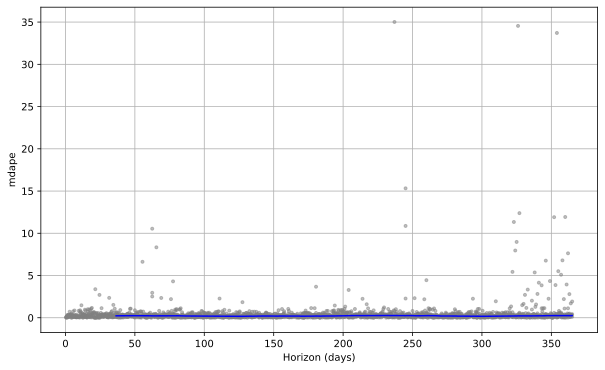

In [21]:
# plot mdap metric
fig = plot_cross_validation_metric(day_cv, metric='mdape')